#Task 8

In [1]:
# Install SWIG, a tool used to connect C/C++ code with Python. It's often used in RL environments to enable efficient communication between Python and low-level implementations of algorithms
!pip install -q swig

# Install the gym library with the box2d environment, used for 2D physics-based simulation tasks
!pip install -q gym[box2d]

# Install stable-baselines3 with extra dependencies (needed for various environments and features in the library), a set of RL algorithms implemented in PyTorch
!pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 40.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using ca

In [2]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.dqn import MlpPolicy
import numpy as np

In [3]:
from stable_baselines3.common.callbacks import BaseCallback

# Create a custom callback class that will log the rewards at each episode
class RewardCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(RewardCallback, self).__init__(verbose)
        self.rewards = []
        self.episode_rewards = []

    def _on_step(self) -> bool:
        # Collect rewards at each step
        reward = self.locals['rewards'][0]
        self.episode_rewards.append(reward)

        if self.locals['dones'][0]:  # Check if an episode is done
            episode_reward = sum(self.episode_rewards)
            self.rewards.append(episode_reward)
            self.episode_rewards = []  # Reset episode rewards for the next episode
            print(f"Episode: {len(self.rewards)}, Reward: {episode_reward}")

        return True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
class CustomMountainCarReward(gym.Wrapper):
    def __init__(self, env):
        super(CustomMountainCarReward, self).__init__(env)

    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        position = obs[0]
        if position >= self.env.goal_position:
            reward = 100  # Reward for reaching the flag
        else:
            reward = -1  # Negative reward for each step taken
        return obs, reward, terminated, truncated, info

In [11]:
from stable_baselines3.common.vec_env import DummyVecEnv

# With custom reward
env = gym.make("MountainCar-v0")
env = CustomMountainCarReward(env)
env = DummyVecEnv([lambda: env])
model = PPO("MlpPolicy", env, verbose=1)
reward_callback = RewardCallback()
model.learn(total_timesteps=10000, callback=reward_callback)
rewards_custom = reward_callback.rewards

# With original reward
env = gym.make("MountainCar-v0")
env = DummyVecEnv([lambda: env])
model = PPO("MlpPolicy", env, verbose=1)
reward_callback = RewardCallback()
model.learn(total_timesteps=10000, callback=reward_callback)
rewards_original = reward_callback.rewards

Using cuda device
Episode: 1, Reward: -200.0
Episode: 2, Reward: -200.0
Episode: 3, Reward: -200.0
Episode: 4, Reward: -200.0
Episode: 5, Reward: -200.0
Episode: 6, Reward: -200.0
Episode: 7, Reward: -200.0
Episode: 8, Reward: -200.0
Episode: 9, Reward: -200.0
Episode: 10, Reward: -200.0
-----------------------------
| time/              |      |
|    fps             | 627  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
Episode: 11, Reward: -200.0
Episode: 12, Reward: -200.0
Episode: 13, Reward: -200.0
Episode: 14, Reward: -200.0
Episode: 15, Reward: -200.0
Episode: 16, Reward: -200.0
Episode: 17, Reward: -200.0
Episode: 18, Reward: -200.0
Episode: 19, Reward: -200.0
Episode: 20, Reward: -200.0
------------------------------------------
| time/                   |              |
|    fps                  | 505          |
|    iterations           | 2            |
|    time_elapsed         | 8            |
|    t

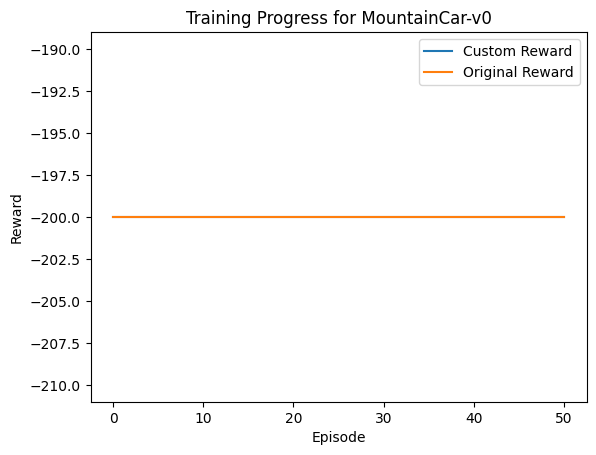

In [12]:
import matplotlib.pyplot as plt

# Plot results
plt.figure()
plt.plot(rewards_custom, label='Custom Reward')
plt.plot(rewards_original, label='Original Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Training Progress for MountainCar-v0')
plt.legend()
plt.show()